Topic:        Challenge Set 1
<br>Subject:      Explore MTA turnstile data
<br>Date:         01/23/2016
<br>Name:         Hasan Haq

**Challenge 1**

In [25]:
# Challenge Set 1 - MTA Turnstile Data

import numpy as np
import dateutil.parser
import itertools
import datetime
import operator
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [5]:
# # Challenge 1

# data_dict_1 = {}

# with open('turnstile_170114.txt', 'rb') as csvfile:
#     data = csv.reader(csvfile, delimiter=',')
#     next(data, None)
#     for i in data:
#         temp = map(lambda x: x.strip(), i) 
#         if tuple(temp[:4]) in data_dict_1.keys():
#             data_dict_1[tuple(temp[:4])].append(temp[4:])
#         else:
#             data_dict_1[tuple(temp[:4])] = temp[4:]
            
# data_dict_1

In [6]:
# np.save('data_dict_1.npy', data_dict_1)
# data_dict_1 = np.load('data_dict_1.npy')
# data_dict_1 = data_dict_1.item()

**Challenge 2**

In [7]:
# # Challenge 2

# data_dict_2 = {}

# with open('turnstile_170114.txt', 'rb') as csvfile:
#     data = csv.reader(csvfile, delimiter=',')
#     next(data, None)
#     for i in data:
#         temp = map(lambda x: x.strip(), i)
#         if tuple(temp[:4]) in data_dict_2.keys():
#             data_dict_2[tuple(temp[:4])].append([dateutil.parser.parse(" ".join(temp[6:8])), temp[9]])
#         else:
#             data_dict_2[tuple(temp[:4])] = [[dateutil.parser.parse(" ".join(temp[6:8])), temp[9]]]

In [8]:
# np.save('data_dict_2.npy', data_dict_2)
data_dict_2 = np.load('data_dict_2.npy')
data_dict_2 = data_dict_2.item()

**Challenge 3**

In [9]:
# Challenge 3

combined = {}

for key, val in data_dict_2.iteritems():
    i=0
    while i<(len(val)-5):
        day = data_dict_2[key][i][0].strftime("%Y-%m-%d")
        if key not in combined.keys():
            combined[key] = [(day, max(0,int(data_dict_2[key][i+5][1])-int(data_dict_2[key][i][1])))]
        else:
            combined[key].append((day, max(0,int(data_dict_2[key][i+5][1])-int(data_dict_2[key][i][1]))))
        i+=6

**Challenge 4**

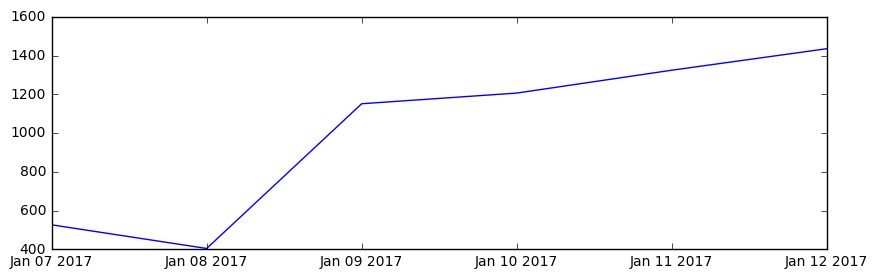

In [11]:
# Challenge 4

dates = []
counts = []

for i in combined[combined.keys()[0]]:
    dates.append(datetime.datetime.strptime(i[0], "%Y-%m-%d"))
    counts.append(i[1])

plt.figure(figsize=(10,3))
plt.plot(dates,counts);

**Challenge 5**

In [12]:
# Challenge 5

by_turnstile = {}

for key, val in combined.iteritems():
    if key[2] in by_turnstile.keys():
        by_turnstile[key[2]] = [(a[0], a[1]+b[1]) for a, b in zip(by_turnstile[key[2]], combined[key])]
    else:
        by_turnstile[key[2]] = val

In [13]:
# # Challenge 6

# by_station = {}

# for key, val in by_turnstile.iteritems():
#     for a, b in val:
#         if a in by_date.keys():
#             by_date[a] += b
#         else:
#             by_date[a] = b

**Challenge 6**

In [14]:
# Challenge 6

by_station = {}

for key, val in combined.iteritems():
    if key[3] in by_station.keys():
        by_station[key[3]] = [(a[0], a[1]+b[1]) for a, b in zip(by_station[key[3]], combined[key])]
    else:
        by_station[key[3]] = val

**Challenge 7**

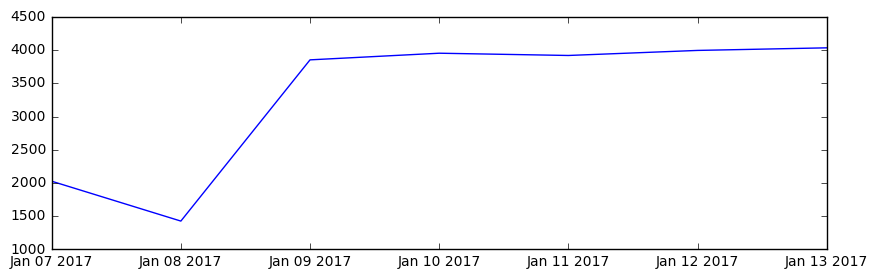

In [15]:
# Challenge 7

dates = []
counts = []

for i in by_station[by_station.keys()[0]]:
    dates.append(datetime.datetime.strptime(i[0], "%Y-%m-%d"))
    counts.append(i[1])

plt.figure(figsize=(10,3))
plt.plot(dates,counts);

**Challenge 8**

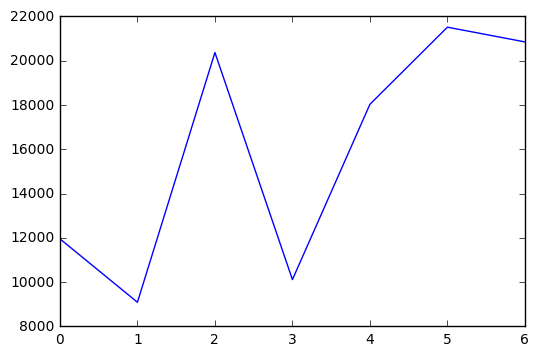

In [19]:
# Challenge 8 - Only used one week of data so this is already done

by_station

week_list = []
for i in by_station['1 AV']:
    week_list.append(i[1])

plt.plot(week_list);

In [48]:
# Challenge 9

by_station_only = {}

for key, val in by_station.iteritems():
    x = 0
    for i in by_station[key]:
        x += i[1]
    by_station_only[key] = x

In [51]:
by_station_only_sorted = sorted(by_station_only.items(), key=operator.itemgetter(1))
by_station_only_sorted.reverse()

**Challenge 9**

In [55]:
# Challenge 9 - Top 10 Stations
by_station_only_sorted[0:10]

[('14 ST-UNION SQ', 67414436),
 ('CORTLANDT ST', 67193791),
 ('34 ST-PENN STA', 51100701),
 ('GRD CNTRL-42 ST', 764532),
 ('34 ST-HERALD SQ', 537251),
 ('86 ST', 524828),
 ('42 ST-PORT AUTH', 461604),
 ('TIMES SQ-42 ST', 430985),
 ('96 ST', 371549),
 ('FULTON ST', 361507),
 ('59 ST COLUMBUS', 361354),
 ('FLUSHING-MAIN', 349134),
 ('59 ST', 346434),
 ('125 ST', 329976),
 ('14 ST', 298681),
 ('23 ST', 291181),
 ('47-50 STS ROCK', 283242),
 ('50 ST', 279211),
 ('CHAMBERS ST', 276323),
 ('JKSN HT-ROOSVLT', 267073),
 ('ATL AV-BARCLAY', 258478),
 ('28 ST', 257363),
 ('WALL ST', 230229),
 ('LEXINGTON AV/53', 227507),
 ('JAMAICA CENTER', 223235),
 ('42 ST-BRYANT PK', 221852),
 ('72 ST', 216731),
 ('BOROUGH HALL', 207039),
 ('116 ST', 193349),
 ('103 ST', 183698),
 ('JAY ST-METROTEC', 178942),
 ('145 ST', 178500),
 ('CHURCH AV', 178180),
 ('77 ST', 168866),
 ('7 AV', 164653),
 ('GRAND ST', 163093),
 ('DEKALB AV', 161932),
 ('W 4 ST-WASH SQ', 160292),
 ('8 AV', 158021),
 ('57 ST-7 AV', 156808),


**Challenge 10**

In [61]:
# Challenge 10 - Plot the Histogram

hist_list = []
hist_index = []

for i in by_station_only_sorted:
    hist_list.append(i[1])
    hist_index.append(i[0])

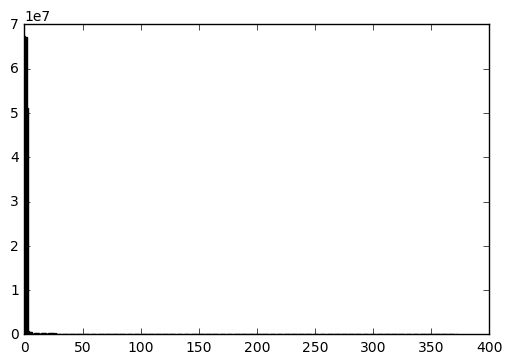

In [67]:
# Very very few stations have the vast majority of traffic

plt.bar(range(len(hist_list)), hist_list);